# Setup

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import importlib, os, ipywidgets

from lib import path_tools as pt
from lib import import_data
from lib import analysis

# XRD

In [3]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "xrd"

In [4]:
importlib.reload(import_data)

<module 'lib.import_data' from '/home/tomas/Documents/sciencetools_py/lib/import_data.py'>

In [5]:
# Identify the folder(s) where the raw, original data is
# Use a dict to store multiple directories that you want ready to plot
XRD_data = {}

samples_dir = {
    "etb053": "191108 ETB-053 MAPbBr on glass FF growth temp/",
    "etb055": "191113 ETB-055 MAPbBr on glass FF growth temp/",
    "etb057": "191118 ETB-057 MAPbBr on glass FF growth temp/",
}

for run_ID in samples_dir.keys():
    XRD_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


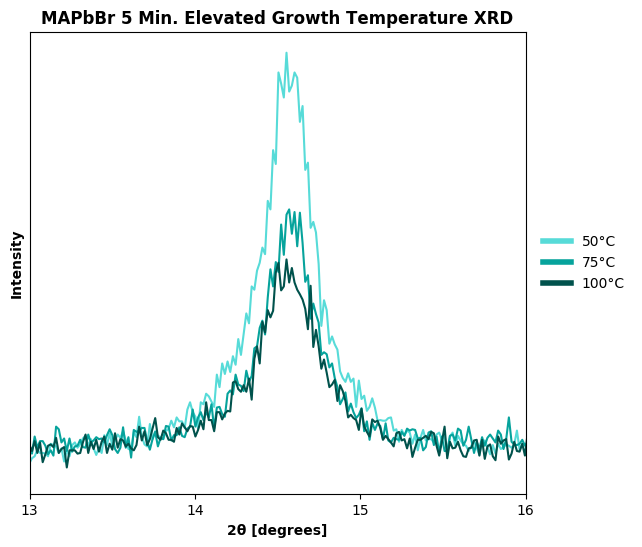

In [35]:
fig2 = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
#     "15min 50C",
#     "15min 75C",
#     "15min 100C",
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
    "5min 50C",
    "5min 75C",
    "5min 100C",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "15min" in sample_ID:
                lbl = sample_ID.replace("15min ", "")
            elif "5min" in sample_ID:
                lbl = sample_ID.replace("5min ", "")
            elif "1min" in sample_ID:
                lbl = sample_ID.replace("1min ", "")
            
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
                
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], XRD_data[run_ID][sample_ID]["counts"],
                     label=lbl)
            
#             offset += samplemax
            
plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(3, rot=4, hue=2, light=0.7, dark=0.2))
    

plt.xlabel("2θ [degrees]", weight="semibold")
plt.ylabel("Intensity", weight="semibold")

plt.xlim(13, 16)
# plt.ylim(2, 500)
# fig_ax.set_ylim(bottom=2)

# fig_ax.set_yticklabels([])
plt.yticks([])
plt.xticks(range(13, 17, 1))
# fig_ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

plt.title("MAPbBr 5 Min. Elevated Growth Temperature XRD",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1),mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)   

In [36]:
fig2.savefig("plots/final/XRD/MAPbBr Temp/5min_overlay.png", dpi=200, format='png', bbox_inches='tight')

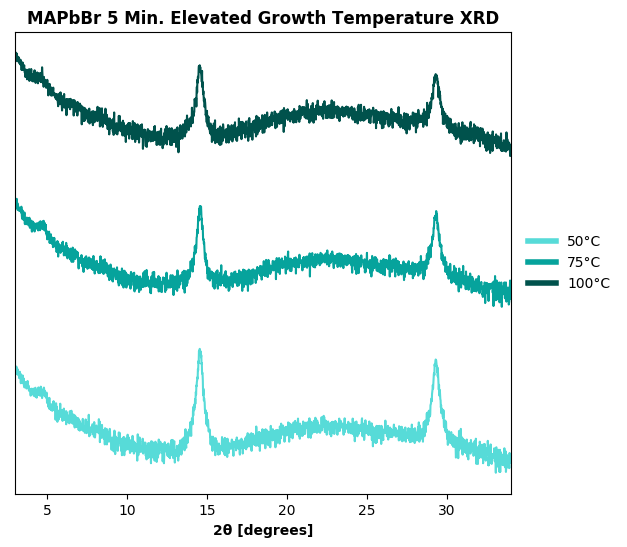

In [42]:
fig = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

offset = 0
lbl = None

master_cypher = (
#     "15min 50C",
#     "15min 75C",
#     "15min 100C",
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
    "5min 50C",
    "5min 75C",
    "5min 100C",
)

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in XRD_data[run_ID].keys():
            samplemax = max(np.log10(XRD_data[run_ID][sample_ID]["counts"]))
            
            if "15min" in sample_ID:
                lbl = sample_ID.replace("15min ", "")
            elif "5min" in sample_ID:
                lbl = sample_ID.replace("5min ", "")
            elif "1min" in sample_ID:
                lbl = sample_ID.replace("1min ", "")
            
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            
            plt.figure(1)
            plt.plot(XRD_data[run_ID][sample_ID]["2theta"], np.log10(XRD_data[run_ID][sample_ID]["counts"]) + offset,
                     label=lbl)
            
            offset += samplemax
            
plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(3, rot=4, hue=2, light=0.7, dark=0.2))

plt.xlabel("2θ [degrees]", weight="semibold")

plt.yticks([])

plt.xlim(3, 34)

plt.title("MAPbBr 5 Min. Elevated Growth Temperature XRD",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1), mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)    

In [43]:
fig.savefig("plots/final/XRD/MAPbBr Temp/5min_stacked.png", dpi=200, format='png', bbox_inches='tight')

# PL

In [47]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "pl"

In [48]:
importlib.reload(import_data)
importlib.reload(analysis)

<module 'lib.analysis' from '/home/tomas/Documents/sciencetools_py/lib/analysis.py'>

In [49]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot
pl_data = {}

samples_dir = {
    "etb053": "191115 ETB-053 MAPbBr on glass FF growth temp/",
    "etb055": "191115 ETB-055 MAPbBr on glass FF growth temp/",
    "etb057": "191122 ETB-057 MAPbBr on glass FF growth temp/",
}

for run_ID in samples_dir:
    pl_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


/home/tomas/Documents/sciencetools_py/lib/analysis.py:14: FutureWarning: `item` has been deprecated and will be removed in a future version
  while (input_df.iloc[current_index]['counts'].item() > (local_max['counts'] / 2)):
/home/tomas/Documents/sciencetools_py/lib/analysis.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version
  while (input_df.iloc[current_index]['counts'].item() > (local_max['counts'] / 2)):
/home/tomas/Documents/sciencetools_py/lib/analysis.py:27: FutureWarning: `item` has been deprecated and will be removed in a future version
  fwhm = right_bound['wavelength'].item() - left_bound['wavelength'].item()
/home/tomas/Documents/sciencetools_py/lib/analysis.py:31: FutureWarning: `item` has been deprecated and will be removed in a future version
  max_location['wavelength'].item(),


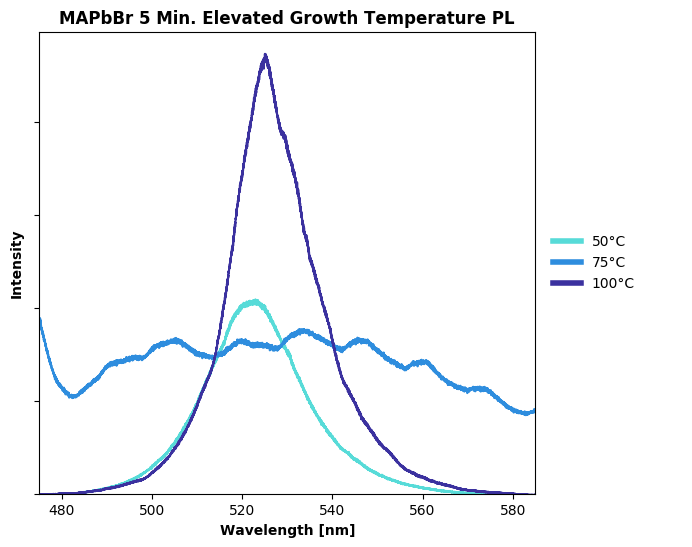

In [73]:
fig3 = plt.figure(1, figsize=[6.4, 6])
fig_ax = plt.gca()

lbl = None

master_cypher = (
#     "15min 50C",
#     "15min 75C",
#     "15min 100C",
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
    "5min 50C",
    "5min 75C",
    "5min 100C",
)

raw_analysis = []

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in pl_data[run_ID].keys():
            raw_analysis.append(analysis.FWHM(flag, sample_ID, pl_data[run_ID][sample_ID]))
            
            if "15min" in sample_ID:
                lbl = sample_ID.replace("15min ", "")
            elif "5min" in sample_ID:
                lbl = sample_ID.replace("5min ", "")
            elif "1min" in sample_ID:
                lbl = sample_ID.replace("1min ", "")
                
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            
            plt.figure(1)
            plt.plot(pl_data[run_ID][sample_ID]["wavelength"], pl_data[run_ID][sample_ID]["counts"],
#                      abs(max(pl_data[run_ID][sample_ID]["counts"])),
                     label=lbl)
        else:
            pass

max_values = pd.DataFrame(data=raw_analysis,columns=['Sample', 'Max_Wavelength', 'Max_Value', 'FWHM'])

plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(3, rot=4, hue=2, light=0.7, dark=0.25))

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Intensity", weight="semibold")

fig_ax.set_yticklabels([])

plt.xlim(475,585)

fig_ax.set_ylim(bottom=0)

plt.title("MAPbBr 5 Min. Elevated Growth Temperature PL",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.3,1),mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)     

In [74]:
fig3.savefig("plots/final/PL/MAPbBr Temp/5min_all.png", dpi=200, format='png', bbox_inches='tight')

In [75]:
max_values.to_csv('plots/final/PL/MAPbBr Temp/5min_all.csv')

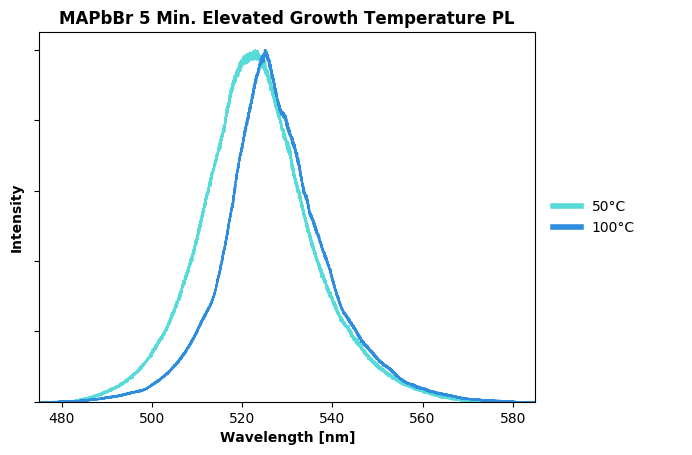

In [78]:
fig6 = plt.figure(1)
fig_ax = plt.gca()

lbl = None

master_cypher = (
#     "15min 50C",
#     "15min 75C",
#     "15min 100C",
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
    "5min 50C",
#     "5min 75C",
    "5min 100C",
)

raw_analysis = []

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in pl_data[run_ID].keys():
#             raw_analysis.append(analysis.FWHM(flag, sample_ID, pl_data[run_ID][sample_ID]))
            
            if "15min" in sample_ID:
                lbl = sample_ID.replace("15min ", "")
            elif "5min" in sample_ID:
                lbl = sample_ID.replace("5min ", "")
            elif "1min" in sample_ID:
                lbl = sample_ID.replace("1min ", "")
                
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
            
            plt.figure(1)
            plt.plot(pl_data[run_ID][sample_ID]["wavelength"], pl_data[run_ID][sample_ID]["counts"]/
                     abs(max(pl_data[run_ID][sample_ID]["counts"])),
                     label=lbl)
        else:
            pass

max_values = pd.DataFrame(data=raw_analysis,columns=['Sample', 'Max_Wavelength', 'Max_Value', 'FWHM'])

plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(3, rot=4, hue=2, light=0.7, dark=0.25))

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Intensity", weight="semibold")

fig_ax.set_yticklabels([])

plt.xlim(475,585)

fig_ax.set_ylim(bottom=0)

plt.title("MAPbBr 5 Min. Elevated Growth Temperature PL",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.3,1),mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)     

In [79]:
fig6.savefig("plots/final/PL/MAPbBr Temp/5min_all_norm.png", dpi=200, format='png', bbox_inches='tight')

# UV-Vis

In [84]:
pt.wipe_scrap()

    # Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "uvvis"

In [85]:
importlib.reload(import_data);

In [86]:
# Identify the folder(s) where the raw, original data is
# Use a dict to store multiple directories that you want ready to plot
uv_data = {}

samples_dir = {
    "etb053": "191115 ETB-053 MAPbBr on glass FF growth temp/",
    "etb055": "191115 ETB-055 MAPbBr on glass FF growth temp/",
    "etb057": "191122 ETB-057 MAPbBr on glass FF growth temp/",
}

for run_ID in samples_dir.keys():
    uv_data[run_ID] = import_data.init(flag, samples_dir[run_ID])

Creating new local data folder.
Creating new local data folder.
Creating new local data folder.


In [14]:
# Expression to find where index = X nm for normalizing later
uv_data["etb044"]['1min'].index[uv_data["etb044"]['1min']['wavelength'] == 550]

Int64Index([250], dtype='int64')

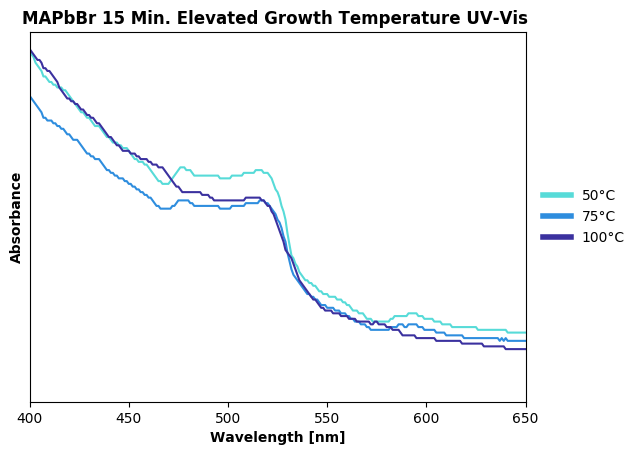

In [100]:
fig4 = plt.figure(1)
fig_ax = plt.gca()

plotted = None
localmax = 0
lbl = []

master_cypher = (
    "15min 50C",
    "15min 75C",
    "15min 100C",
#     "1min 50C",
#     "1min 75C",
#     "1min 100C",
#     "5min 50C",
#     "5min 75C",
#     "5min 100C",
)

for sample_ID in master_cypher:
    
    for run_ID in samples_dir.keys():
        if sample_ID in uv_data[run_ID].keys() and plotted != True:
            
#             localmax = uv_data[run_ID][sample_ID]["abs"].loc[50:120].max()
            
            if "15min" in sample_ID:
                lbl = sample_ID.replace("15min ", "")
            elif "5min" in sample_ID:
                lbl = sample_ID.replace("5min ", "")
            elif "1min" in sample_ID:
                lbl = sample_ID.replace("1min ", "")
            
#             lbl= sample_ID
    
            if "C" in lbl:
                lbl = lbl.replace("C", "°C")
    
            plt.figure(1)
            plt.plot(uv_data[run_ID][sample_ID]["wavelength"], uv_data[run_ID][sample_ID]["abs"],
#                      abs(uv_data[run_ID][sample_ID]["abs"].min()),
#                      localmax,
                     label=lbl)
            
            plotted = True
            localmax = 0
        else:
            pass
    
    plotted = False

plt.style.use('default')
sns.set_palette(sns.cubehelix_palette(3, rot=4, hue=2, light=0.7, dark=0.25))

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Absorbance", weight="semibold")

plt.yticks([])

plt.xlim(400, 650)

plt.title("MAPbBr 15 Min. Elevated Growth Temperature UV-Vis ",weight="semibold")

leg = plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1), mode='expand', frameon=False)
for i in leg.legendHandles:
    i.set_linewidth(4)   

In [87]:
uv_data["etb070"]["120min"]["abs"].loc[50:120].max()

1.1840000000000002

In [101]:
fig4.savefig("plots/final/UVVIS/MAPbBr Temp/15min_cleaned.png", dpi=200, format='png', bbox_inches='tight')